In [54]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [55]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

In [56]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [57]:
df = pd.read_csv('./20221117.csv', index_col=0,encoding='euc-kr')
df.head(5)

,가야,일평균승하차,사업체수,인구수(가중치),전체 상가 면적,운수수익
0,감전,7761,345,53260345,68.0,1992142
1,강서구청,6221,345,53260345,76.0,2622066
2,개금,8327,246,26287642,24.0,2098721
3,거제,5360,302,28679040,78.0,4878859
4,경성대·부경대,5490,302,28679040,24.0,3205832


In [58]:
df.isnull().sum()

가야          0
일평균승하차      0
사업체수        0
인구수(가중치)    0
전체 상가 면적    9
운수수익        0
dtype: int64

In [59]:
df = df.fillna(0)
df.isnull().sum()

가야          0
일평균승하차      0
사업체수        0
인구수(가중치)    0
전체 상가 면적    0
운수수익        0
dtype: int64

### 산점도

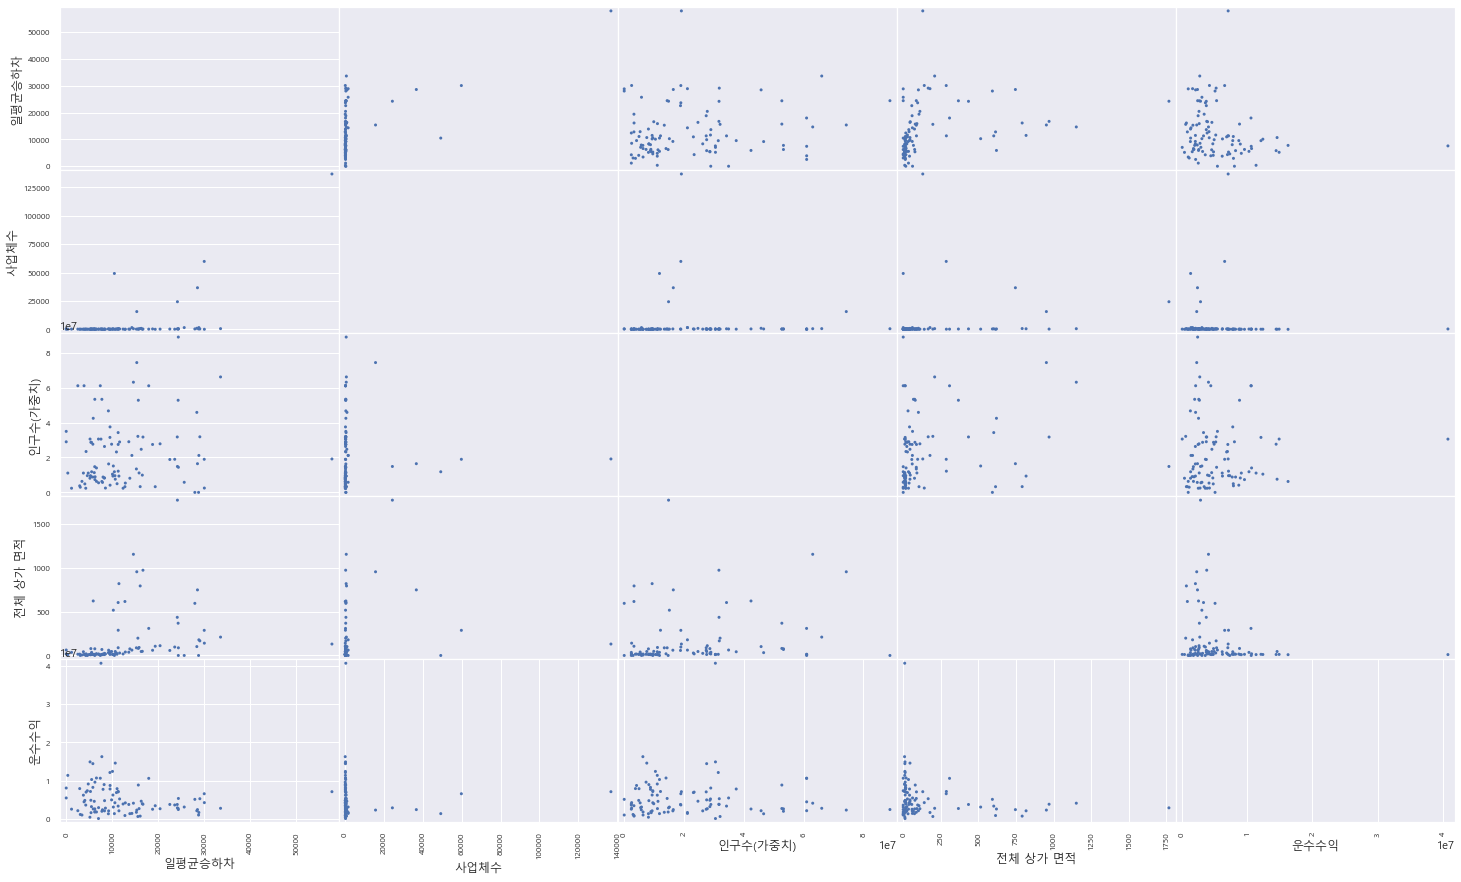

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

#### 일평균 운행수익과 각 변수별 산점도

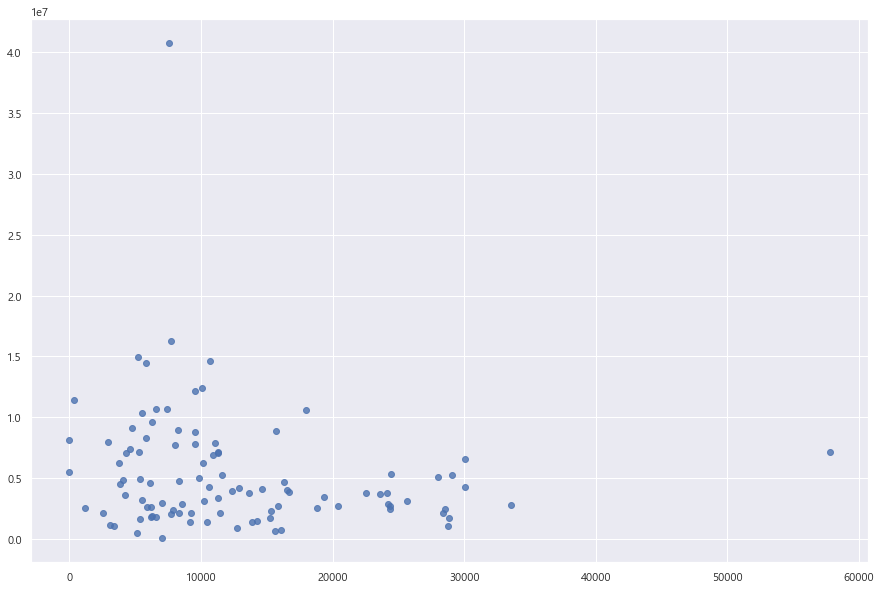

In [61]:
# 일평균 승하차와 일평균 수익 산점도
plt.scatter(df[['일평균승하차']], df[['운수수익']], alpha=0.8)
plt.show()

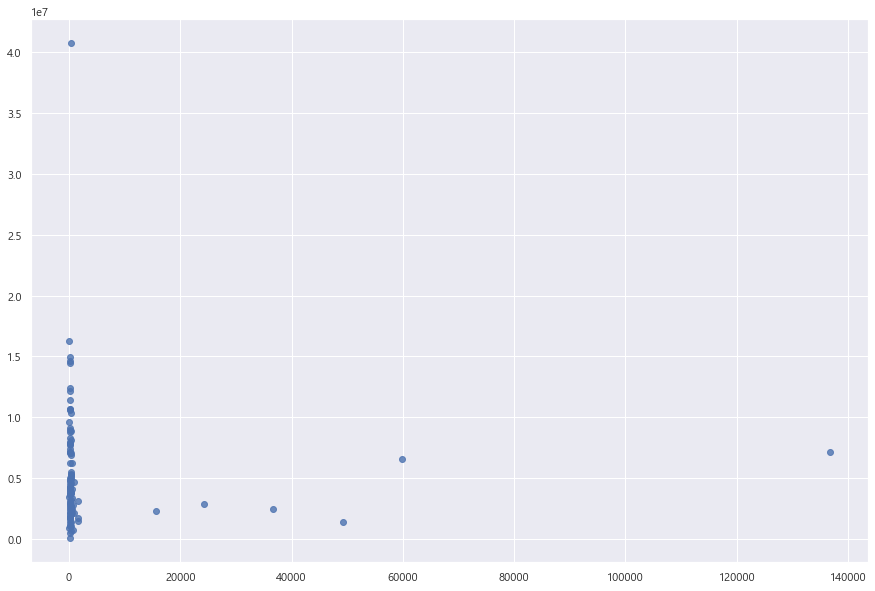

In [62]:
# 사업체수와 일평균 수익 산점도
plt.scatter(df[['사업체수']], df[['운수수익']], alpha=0.8)
plt.show()

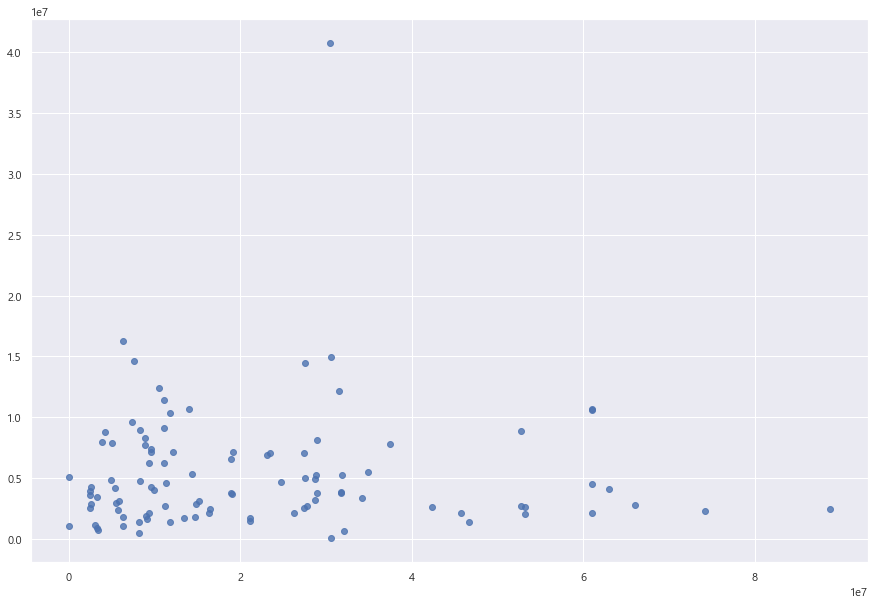

In [63]:
# 인구수(가중치)와 일평균 수익 산점도
plt.scatter(df[['인구수(가중치)']], df[['운수수익']], alpha=0.8)
plt.show()

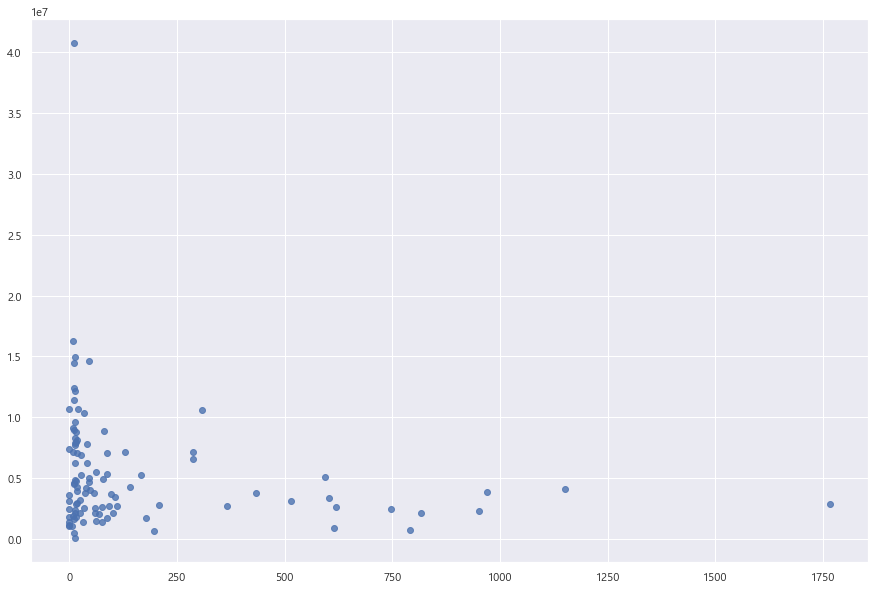

In [64]:
# 전체 상가 면적와 일평균 수익 산점도
plt.scatter(df[['전체 상가 면적']], df[['운수수익']], alpha=0.8)
plt.show()

## 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [65]:
df_dr_corr = df.corr()
df_dr_corr

,일평균승하차,사업체수,인구수(가중치),전체 상가 면적,운수수익
일평균승하차,1.000000,0.546128,0.128095,0.304996,-0.172661
사업체수,0.546128,1.000000,-0.013754,0.153208,-0.013475
인구수(가중치),0.128095,-0.013754,1.000000,0.176950,0.003341
전체 상가 면적,0.304996,0.153208,0.176950,1.000000,-0.189772
운수수익,-0.172661,-0.013475,0.003341,-0.189772,1.000000


### 히트맵 확인

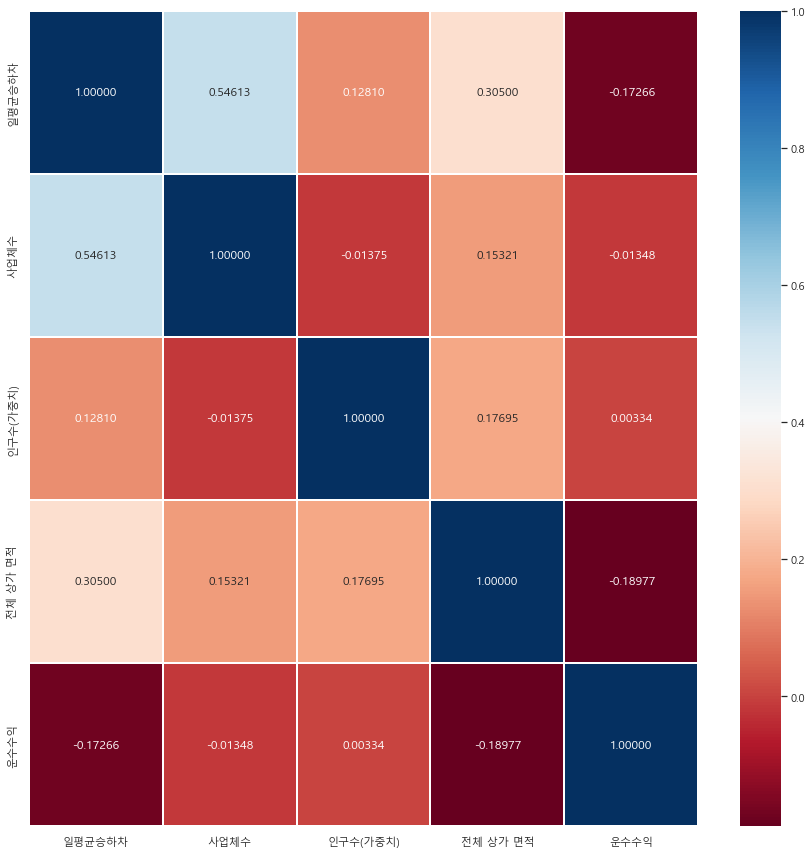

In [66]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

## 다중회귀분석

In [67]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [68]:
x = df[["일평균승하차","사업체수","인구수(가중치)","전체 상가 면적"]]

In [69]:
y = df[["운수수익"]]

In [70]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [71]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [72]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                   운수수익   R-squared (uncentered):                   0.341
Model:                            OLS   Adj. R-squared (uncentered):              0.301
Method:                 Least Squares   F-statistic:                              8.527
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    1.31e-05
Time:                        18:13:22   Log-Likelihood:                         -1198.5
No. Observations:                  70   AIC:                                      2405.
Df Residuals:                      66   BIC:                                      2414.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.979
- Adj. R-squared : 0.975
- Prob (F-statistic) : 1.12e-46
- P>[t] : 일평균승하차, 업장수, 20~40대 인구 수 외에는 유의미하지 않음

In [ ]:
x = df_dr[["일평균승하차","업장수","20~40대 인구 수"]]

In [ ]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [ ]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             일평균운행수익(원)   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              853.3
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    1.05e-52
Time:                        17:40:01   Log-Likelihood:                         -1064.6
No. Observations:                  69   AIC:                                      2135.
Df Residuals:                      66   BIC:                                      2142.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

- Adj. R-squared : 0.974
- Prob (F-statistic) : 1.05e-52
- p-value : 일평균승하차, 업장수 : 0.000 (O)  /  20~40대 인구 수 : 0.390 (X)

### 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [ ]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.9527677599960804

In [ ]:
multi_model.score(x_test, y_test)

0.8422936316025966

### 예측

In [ ]:
my_predict = mlr.predict(x_test)
my_predict

array([[13510831.88724767],
       [ 3846403.24530334],
       [ 5024530.88801793],
       [ 2754575.58536856],
       [ 7391389.63021528],
       [ 7337785.66655835],
       [ 2380674.29449843],
       [ 6413439.52100281],
       [ 2131238.89748227],
       [ 2212406.73452986],
       [ 2234971.36429923],
       [ 7947183.20454843],
       [ 2871949.88797517],
       [ 4356973.4027706 ],
       [ 1000094.97004841],
       [ 3288371.79538612],
       [ 3911232.0605322 ],
       [ 2834766.60510549],
       [ 3924392.50513531],
       [ 9252966.49719391],
       [ 8369697.16335739],
       [  322419.77613433],
       [ -261986.30185019],
       [  664701.93539968],
       [ 4805022.36742917],
       [15292359.68393732],
       [ 2849854.76431096],
       [10273548.10447977],
       [ 6093941.69734518],
       [ 1817593.23870173]])

### 시각화

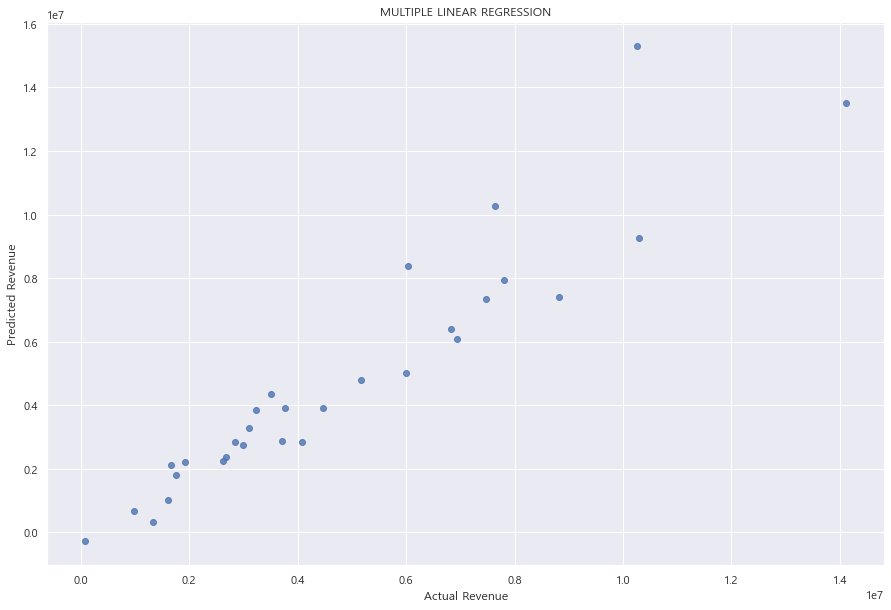

In [ ]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 상관계수 확인

In [ ]:
print(mlr.coef_)

[[391.40297758 111.39587008 126.28345659]]


## 표준화(Standard) 후 재분석

### 표준화

In [ ]:
# Numpy 를 이용한 표준화 : z = (x - mean())/std()
df_dr_standard = (df_dr - np.mean(df_dr, axis=0)) / np.std(df_dr, axis=0)
df_dr_standard

,일평균승하차,업장수,1인 가구수,2인 가구수,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,20~40대 인구 수,일평균운행수익(원)
0,-0.740116,-0.208364,0.805435,0.215165,-0.428342,-0.352483,-0.489622,-0.307810,0.167943,-0.673360
1,-0.706918,-0.194391,-0.083149,-0.285848,-0.428342,-0.352483,-0.493046,-0.307810,-0.739973,-0.548593
2,-0.906969,-0.205321,-0.936811,-1.295686,-0.584821,-0.352483,-0.527288,-0.307810,-1.564967,-0.652251
3,0.102986,-0.206004,0.614193,-0.367885,-0.115384,-0.352483,-0.400594,-0.307810,0.444210,-0.101596
4,-0.336242,-0.213519,-1.072066,-0.850341,-0.428342,-0.352483,-0.472501,-0.307810,-1.109740,-0.432968
...,...,...,...,...,...,...,...,...,...,...
94,-0.783338,-0.207867,-0.544902,-0.290731,-0.428342,-0.352483,-0.493046,-0.307810,-0.693435,-0.839083
95,0.127238,-0.209668,-0.369181,-0.941168,0.041096,-0.352483,-0.270475,-0.307810,-0.954895,0.161681
96,1.769249,-0.197683,0.593683,0.317711,0.197575,-0.352483,0.041125,-0.307810,0.706516,1.187584
97,0.660563,-0.196813,0.504436,0.451510,-0.271863,0.459047,-0.325262,0.040057,0.409095,0.740694


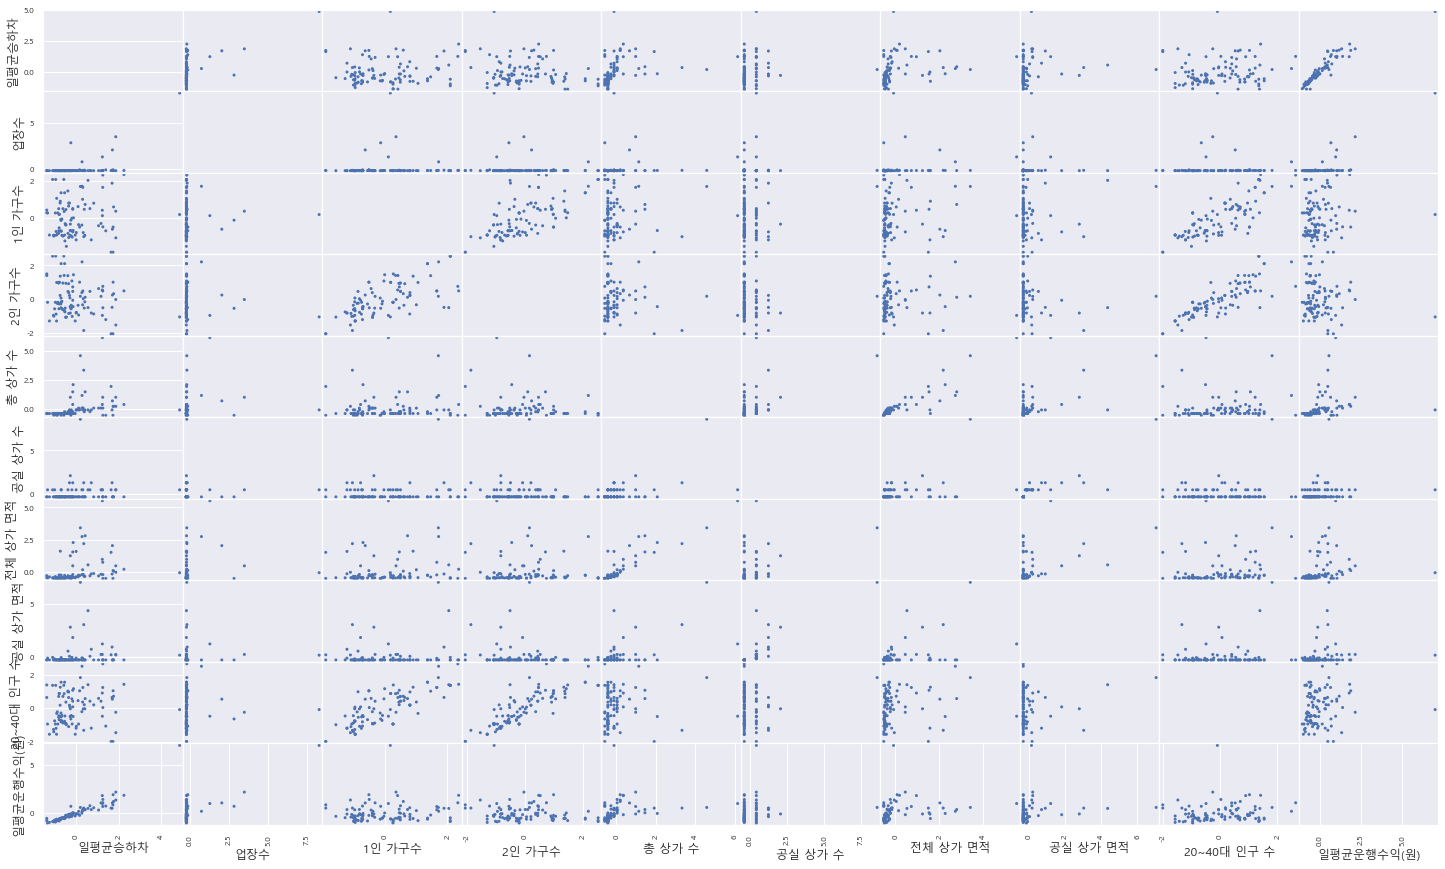

In [ ]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df_dr_standard,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

#### 일평균 운행수익과 각 변수별 산점도

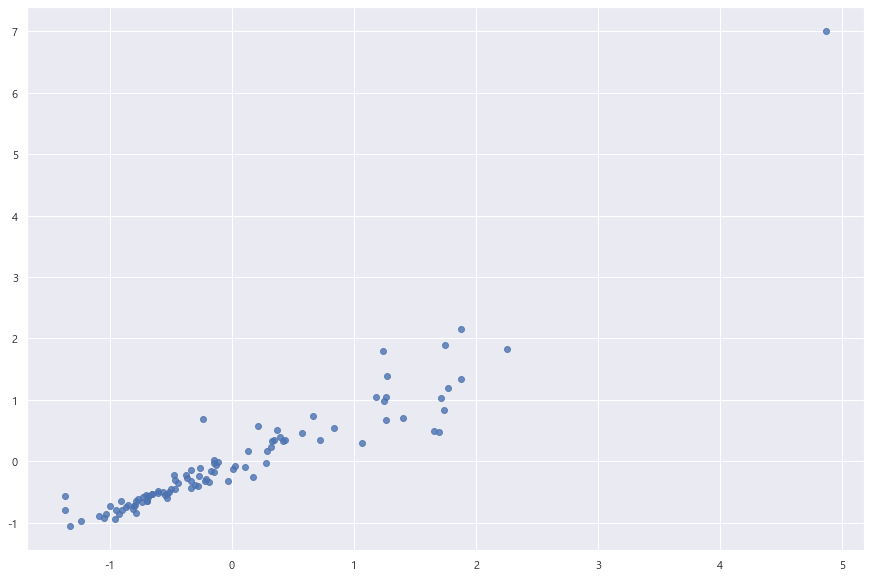

In [ ]:
# 일평균 승하차와 일평균 수익 산점도
plt.scatter(df_dr_standard[['일평균승하차']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

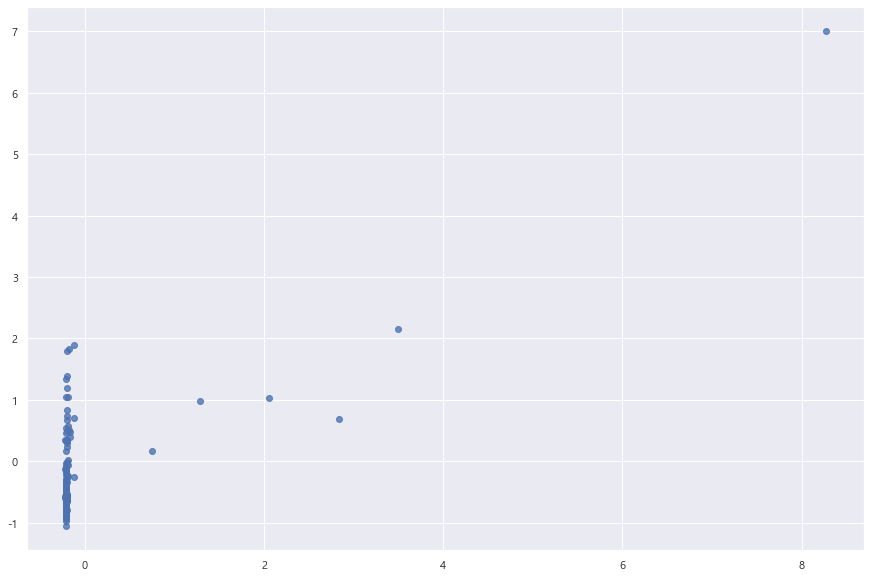

In [ ]:
# 업장수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['업장수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

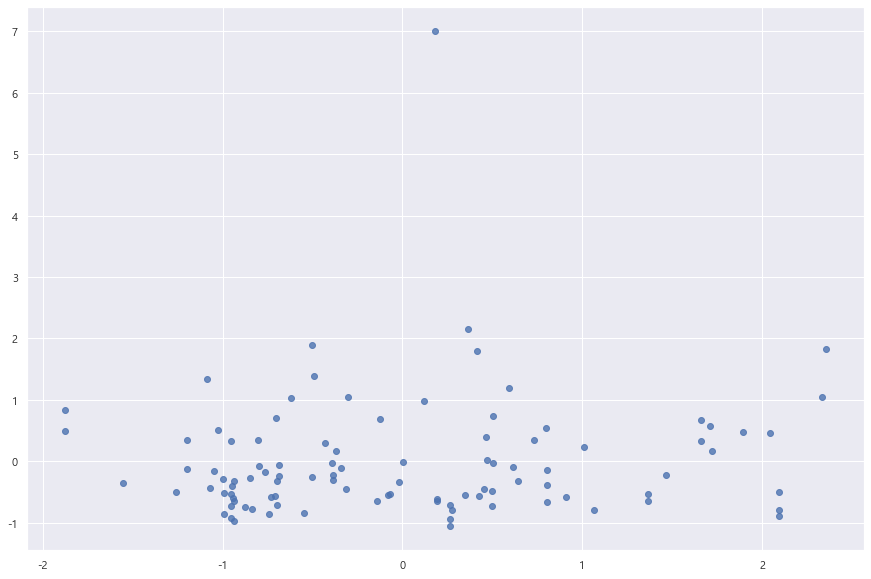

In [ ]:
# 1인 가구수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['1인 가구수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

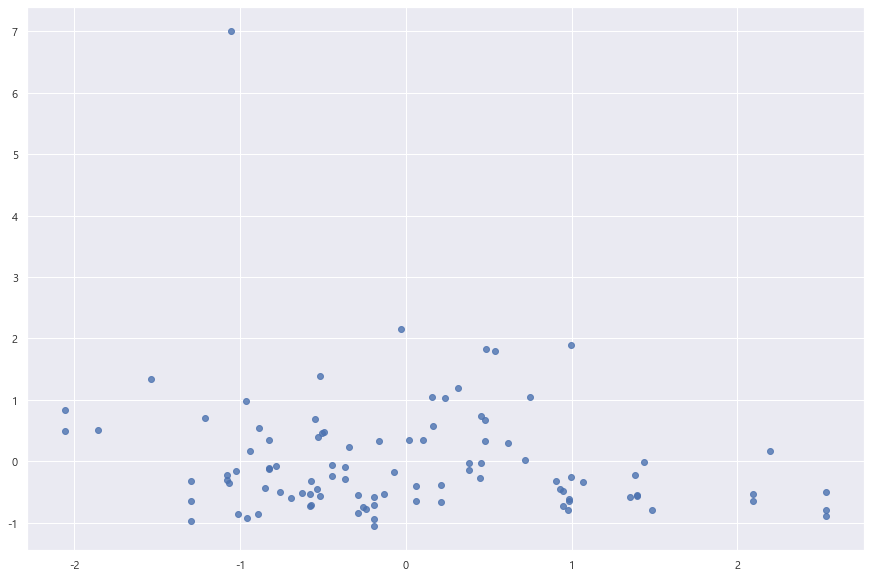

In [ ]:
# 2인 가구수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['2인 가구수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

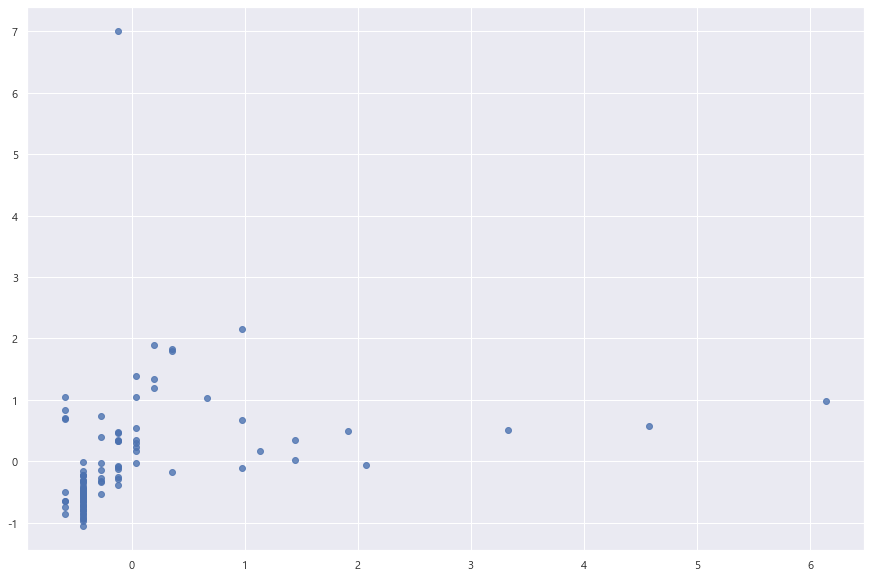

In [ ]:
# 총 상가 수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['총 상가 수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

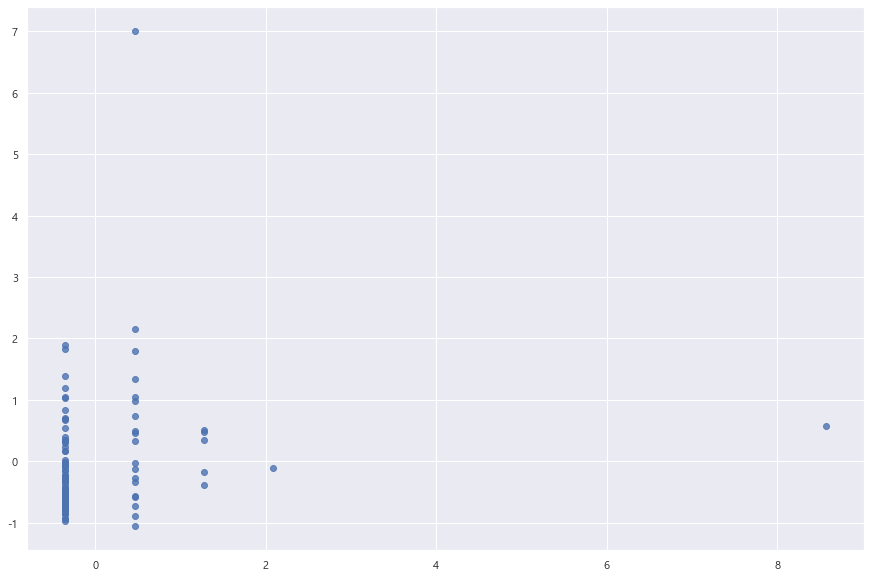

In [ ]:
# 공실 상가 수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['공실 상가 수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

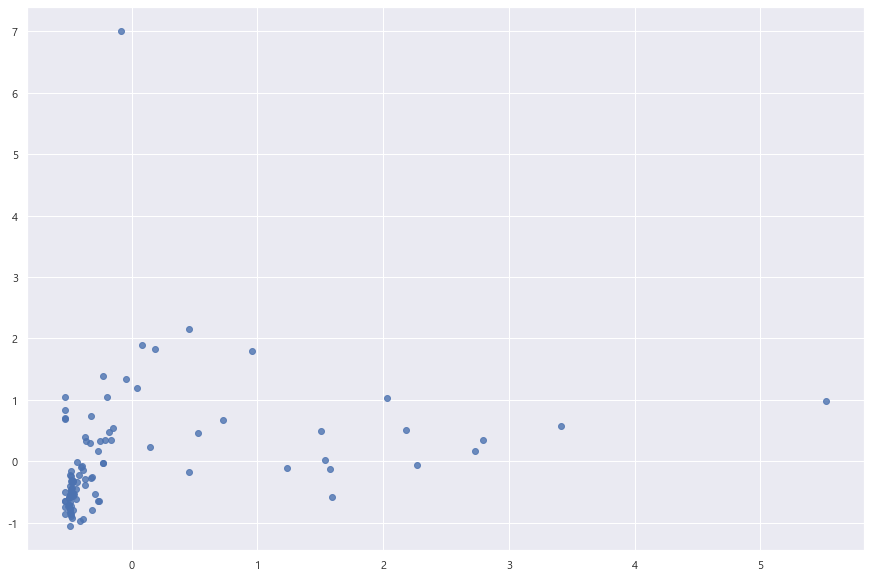

In [ ]:
# 전체 상가 면적와 일평균 수익 산점도
plt.scatter(df_dr_standard[['전체 상가 면적']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

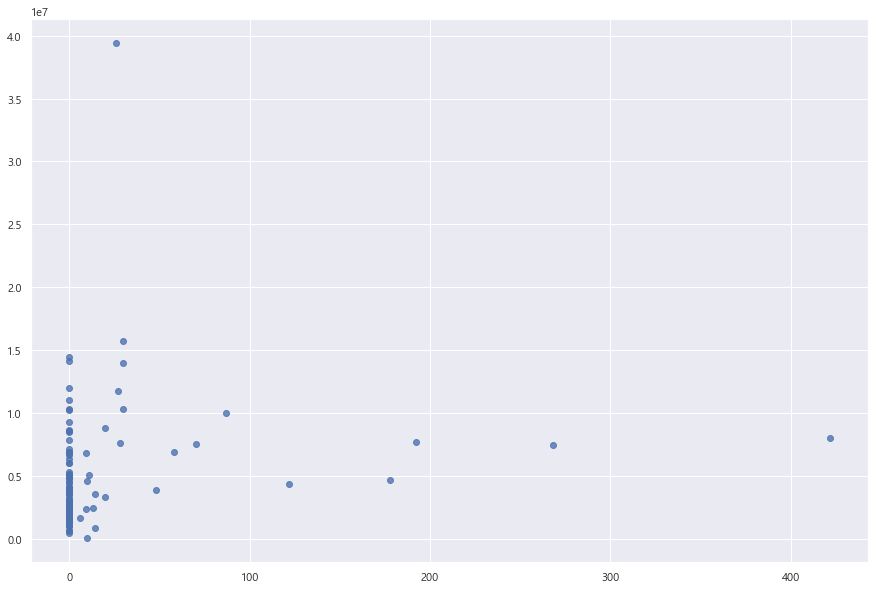

In [ ]:
# 공실 상가 면적와 일평균 수익 산점도
plt.scatter(df_dr[['공실 상가 면적']], df_dr[['일평균운행수익(원)']], alpha=0.8)
plt.show()

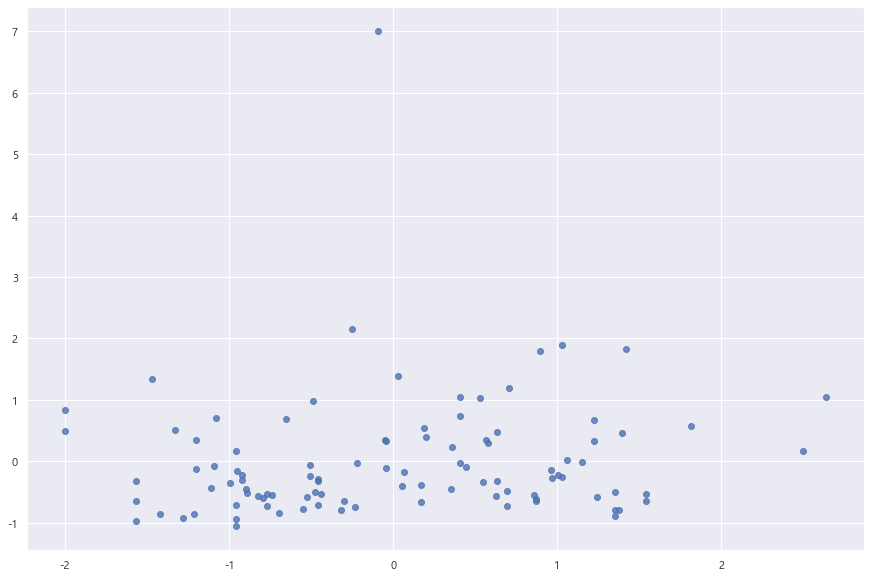

In [ ]:
# 20~40대 인구 수와 일평균 수익 산점도
plt.scatter(df_dr_standard[['20~40대 인구 수']], df_dr_standard[['일평균운행수익(원)']], alpha=0.8)
plt.show()

표준화 전/후 같은 산점도가 나옴

### 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [ ]:
df_standard_corr = df_dr_standard.corr()
df_standard_corr

,일평균승하차,업장수,1인 가구수,2인 가구수,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,20~40대 인구 수,일평균운행수익(원)
일평균승하차,1.000000,0.546338,0.073517,-0.219489,0.324463,0.136527,0.300698,0.142856,0.101749,0.923841
업장수,0.546338,1.000000,0.031838,-0.094213,0.130454,0.042534,0.151750,0.020812,-0.003959,0.745880
1인 가구수,0.073517,0.031838,1.000000,0.678060,0.075568,0.136978,0.123196,0.161959,0.795652,0.100708
2인 가구수,-0.219489,-0.094213,0.678060,1.000000,-0.140730,-0.074858,-0.046498,-0.137080,0.833922,-0.165102
총 상가 수,0.324463,0.130454,0.075568,-0.140730,1.000000,0.542959,0.903864,0.584399,0.075275,0.279989
공실 상가 수,0.136527,0.042534,0.136978,-0.074858,0.542959,1.000000,0.420372,0.859608,0.122423,0.156888
전체 상가 면적,0.300698,0.151750,0.123196,-0.046498,0.903864,0.420372,1.000000,0.484835,0.160154,0.259099
공실 상가 면적,0.142856,0.020812,0.161959,-0.137080,0.584399,0.859608,0.484835,1.000000,0.140966,0.156004
20~40대 인구 수,0.101749,-0.003959,0.795652,0.833922,0.075275,0.122423,0.160154,0.140966,1.000000,0.127530
일평균운행수익(원),0.923841,0.745880,0.100708,-0.165102,0.279989,0.156888,0.259099,0.156004,0.127530,1.000000


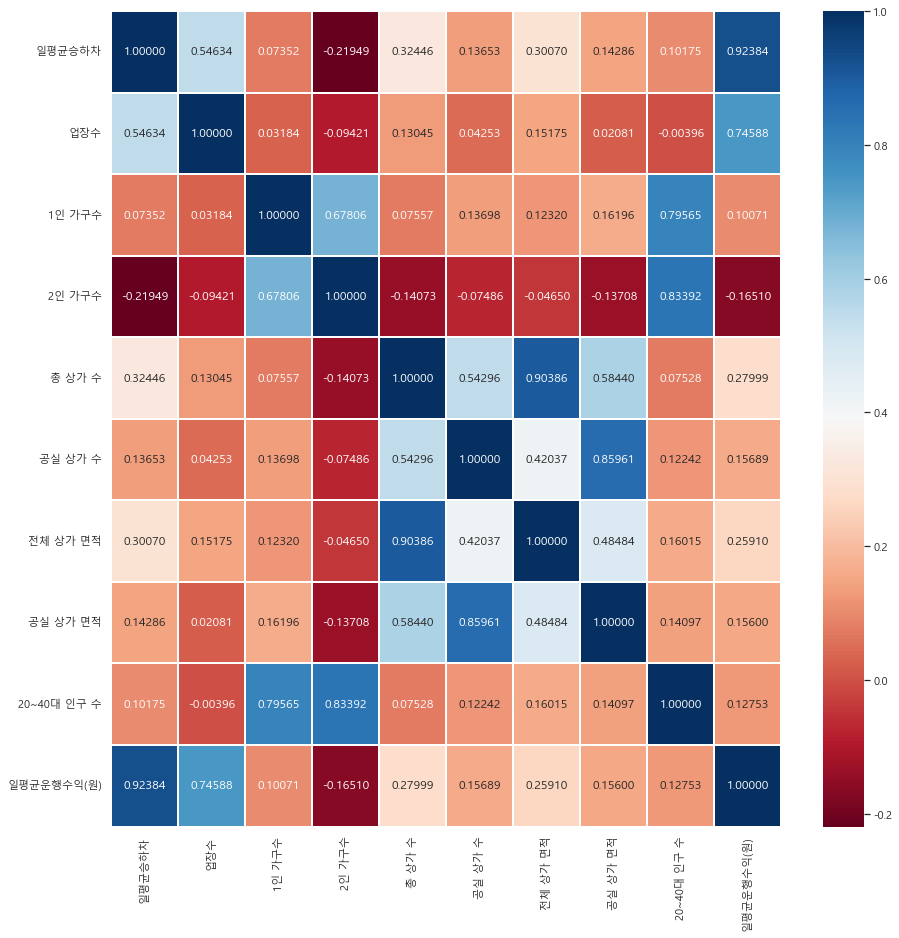

In [ ]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_standard_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

표준화 전/후 동일한 상관계수

### 다중회귀분석

#### 회귀모델 적합도

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
standard_x = df_dr_standard[["일평균승하차","업장수","1인 가구수","2인 가구수","총 상가 수","공실 상가 수","전체 상가 면적","공실 상가 면적","20~40대 인구 수"]]

In [ ]:
standard_y = df_dr_standard[["일평균운행수익(원)"]]

In [ ]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [ ]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [ ]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             일평균운행수익(원)   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              152.6
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    6.35e-38
Time:                        17:40:08   Log-Likelihood:                          4.1045
No. Observations:                  69   AIC:                                      9.791
Df Residuals:                      60   BIC:                                      29.90
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

- R-squared : 0.958
- Adj. R-squared : 0.952
- p-value : 일평균승하차, 업장수 외는 의미 X

- 표준화 전/후 비교 : 20~40대 인구수의 p-value는 0.05보다 커졌다 

In [ ]:
standard_x = df_dr_standard[["일평균승하차","업장수"]]

In [ ]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [ ]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [ ]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             일평균운행수익(원)   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              635.4
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    2.75e-44
Time:                        17:40:08   Log-Likelihood:                         -2.0873
No. Observations:                  69   AIC:                                      8.175
Df Residuals:                      67   BIC:                                      12.64
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.950
- Adj. R-squared : 0.948
- p-value : 일평균승하차, 업장수 모두 유의미함

- 표준화 전/후 비교 : 전과 동일

#### 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [ ]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.949863504759894

In [ ]:
multi_model.score(x_test, y_test)

0.8404477247521729

#### 예측

In [ ]:
my_predict = mlr.predict(x_test)
my_predict

array([[ 1.62890365],
       [-0.28485707],
       [ 0.02100304],
       [-0.45180147],
       [ 0.42604748],
       [ 0.35436214],
       [-0.52957797],
       [ 0.17345827],
       [-0.6788707 ],
       [-0.629701  ],
       [-0.56736284],
       [ 0.55459726],
       [-0.42590112],
       [-0.20986153],
       [-0.82267015],
       [-0.32835061],
       [-0.32740074],
       [-0.43358866],
       [-0.23714325],
       [ 0.81110284],
       [ 0.490605  ],
       [-1.09519498],
       [-1.07193079],
       [-0.85171284],
       [-0.15457785],
       [ 2.03059644],
       [-0.53029884],
       [ 1.1704307 ],
       [ 0.18631666],
       [-0.67279471]])

#### 시각화

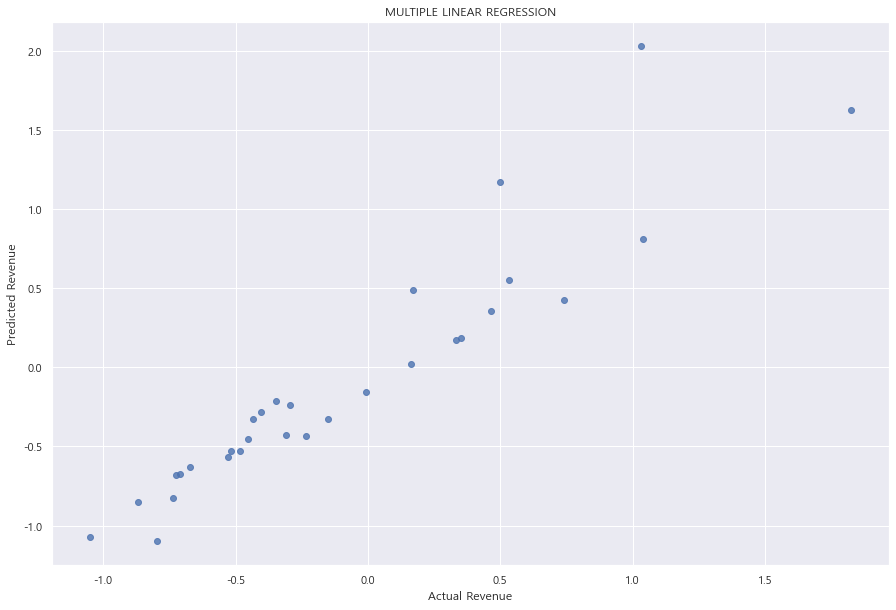

In [ ]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [ ]:
print(mlr.coef_)

[[0.7507609 0.3613238]]


#### 라쏘 회귀 모델

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.949863504759894
0.8404477247521728


C:\Users\admin\AppData\Local\Temp\ipykernel_10084\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+00, tolerance: 8.560e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [ ]:
print(train_score)
print(test_score)

[0.949862670162452, 0.949778838996651, 0.9413847028542649, 0.11832790846166896, 0.0, 0.0]
[0.840838181349398, 0.8442832245394076, 0.8692945794865978, 0.14237363457135477, -0.03488240965710543, -0.03488240965710543]


#### (표준화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.949862670162452</td>
	    <td>0.840838181349398</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.949778838996651</td>
	    <td>0.8442832245394076</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.9413847028542649</td>
	    <td>0.8692945794865978</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.11832790846166896</td>
	    <td>0.14237363457135477</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.03488240965710543</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td>-0.03488240965710543</td>
	</tr>
</table>

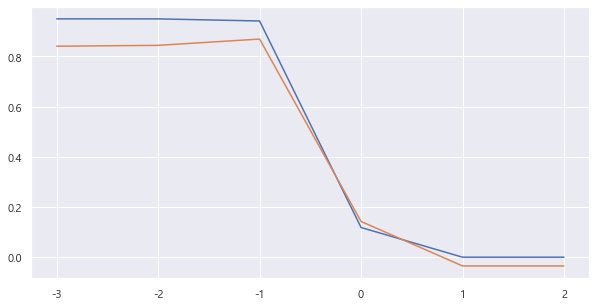

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[0. 0.]
[0.03737044]


#### 릿지 회귀 모델

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.9497757009901865

In [ ]:
ridge.score(X=x_test, y=y_test)

0.8435572570800242

In [ ]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [ ]:
print(train_score)
print(test_score)

[0.949863504669057, 0.9498634956790212, 0.949862599493408, 0.9497757009901865, 0.9430930593956346, 0.7591147203774582]
[0.8404510780343091, 0.8404812347823509, 0.8407805545266169, 0.8435572570800242, 0.8557216014333572, 0.6944879940953291]


In [ ]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[0.34591439 0.27759316]]
[0.01594738]


#### (표준화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.949863504669057</td>
	    <td>0.8404510780343091</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.9498634956790212</td>
	    <td>0.8404812347823509</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.949862599493408</td>
	    <td>0.8407805545266169</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.9497757009901865</td>
	    <td>0.8435572570800242</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.9430930593956346</td>
	    <td>0.8557216014333572</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.7591147203774582</td>
	    <td>0.6944879940953291</td>
	</tr>
</table>

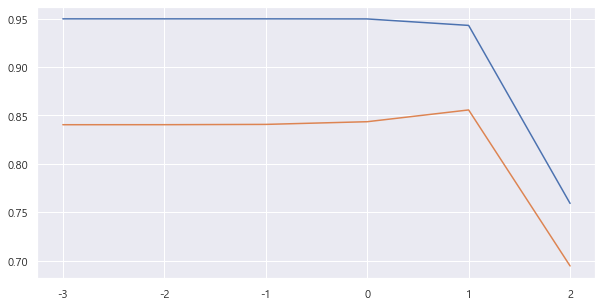

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## 정규화(MinMaxScaler) 후 재분석

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df_dr.max()

일평균승하차            57826.0
업장수              136818.0
1인 가구수             8065.0
2인 가구수             4817.0
총 상가 수               43.0
공실 상가 수              11.0
전체 상가 면적           1767.0
공실 상가 면적            422.0
20~40대 인구 수       11079.0
일평균운행수익(원)     39388852.0
dtype: float64

In [ ]:
df_dr.min()

일평균승하차             0.0
업장수               64.0
1인 가구수           434.0
2인 가구수           117.0
총 상가 수             0.0
공실 상가 수            0.0
전체 상가 면적           0.0
공실 상가 면적           0.0
20~40대 인구 수      121.0
일평균운행수익(원)     86682.0
dtype: float64

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_dr)
df_scaled = scaler.transform(df_dr)

In [ ]:
minmaxscaled_df = pd.DataFrame(df_scaled, columns=df_dr.columns)
minmaxscaled_df

,일평균승하차,업장수,1인 가구수,2인 가구수,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,20~40대 인구 수,일평균운행수익(원)
0,0.100284,0.001009,0.633469,0.494255,0.023256,0.000000,0.006225,0.000000,0.467056,0.046801
1,0.105610,0.002654,0.423405,0.385106,0.023256,0.000000,0.005659,0.000000,0.271217,0.062298
2,0.073514,0.001367,0.221596,0.165106,0.000000,0.000000,0.000000,0.000000,0.093265,0.049423
3,0.235551,0.001287,0.588258,0.367234,0.069767,0.000000,0.020939,0.000000,0.526647,0.117815
4,0.165081,0.000402,0.189621,0.262128,0.023256,0.000000,0.009055,0.000000,0.191458,0.076658
...,...,...,...,...,...,...,...,...,...,...
94,0.093349,0.001068,0.314245,0.384043,0.023256,0.000000,0.005659,0.000000,0.281256,0.026219
95,0.239442,0.000856,0.355786,0.242340,0.093023,0.000000,0.042445,0.000000,0.224859,0.150515
96,0.502888,0.002267,0.583410,0.516596,0.116279,0.000000,0.093945,0.000000,0.583227,0.277933
97,0.325010,0.002369,0.562312,0.545745,0.046512,0.090909,0.033390,0.047393,0.519073,0.222429


In [ ]:
print(minmaxscaled_df.max())
print(minmaxscaled_df.min())

일평균승하차         1.0
업장수            1.0
1인 가구수         1.0
2인 가구수         1.0
총 상가 수         1.0
공실 상가 수        1.0
전체 상가 면적       1.0
공실 상가 면적       1.0
20~40대 인구 수    1.0
일평균운행수익(원)     1.0
dtype: float64
일평균승하차         0.0
업장수            0.0
1인 가구수         0.0
2인 가구수         0.0
총 상가 수         0.0
공실 상가 수        0.0
전체 상가 면적       0.0
공실 상가 면적       0.0
20~40대 인구 수    0.0
일평균운행수익(원)     0.0
dtype: float64


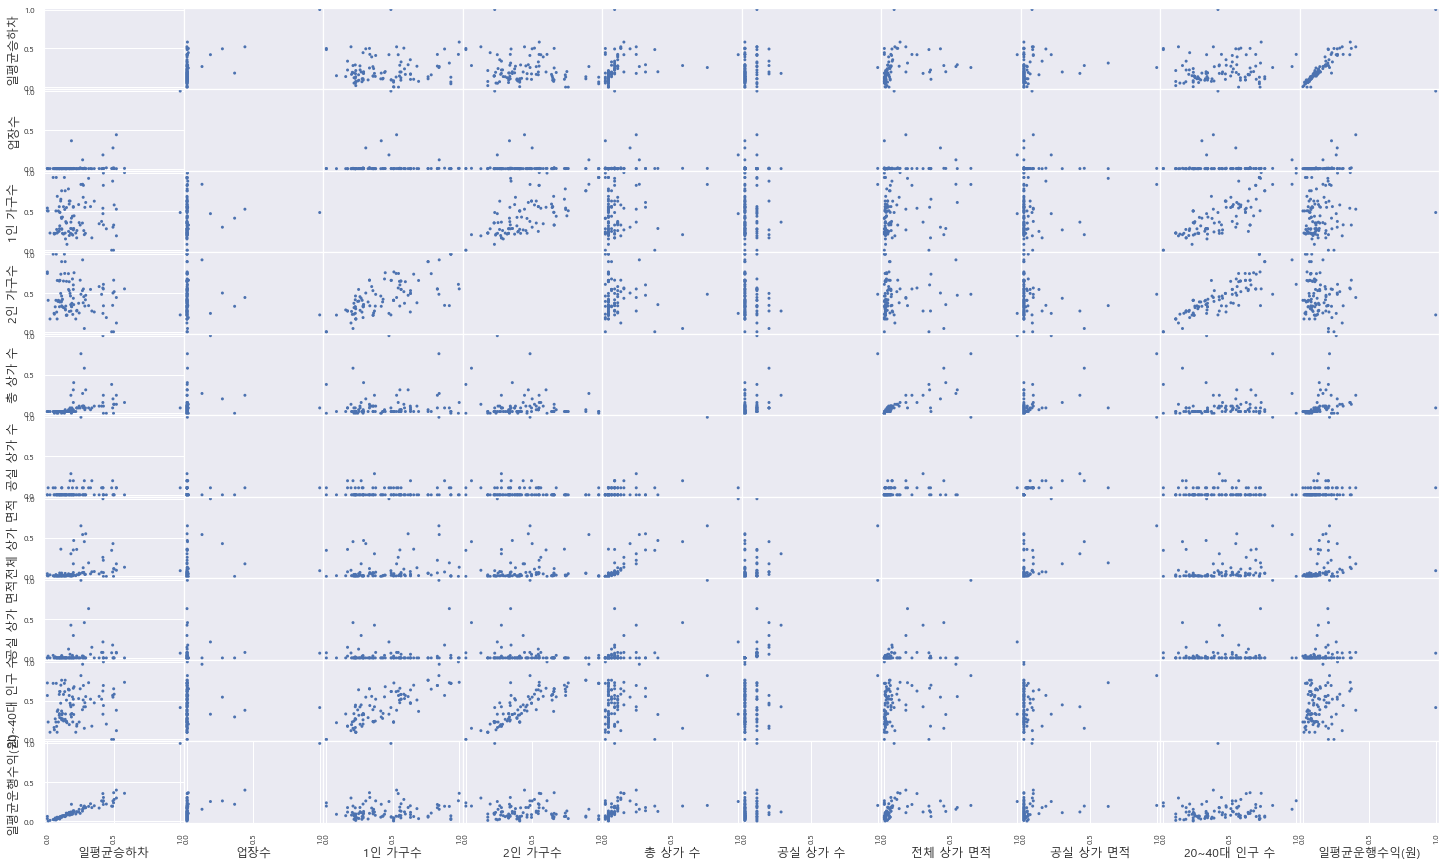

In [ ]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(minmaxscaled_df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 상관계수 확인

In [ ]:
df_minmaxscale_corr = minmaxscaled_df.corr()
df_minmaxscale_corr

,일평균승하차,업장수,1인 가구수,2인 가구수,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,20~40대 인구 수,일평균운행수익(원)
일평균승하차,1.000000,0.546338,0.073517,-0.219489,0.324463,0.136527,0.300698,0.142856,0.101749,0.923841
업장수,0.546338,1.000000,0.031838,-0.094213,0.130454,0.042534,0.151750,0.020812,-0.003959,0.745880
1인 가구수,0.073517,0.031838,1.000000,0.678060,0.075568,0.136978,0.123196,0.161959,0.795652,0.100708
2인 가구수,-0.219489,-0.094213,0.678060,1.000000,-0.140730,-0.074858,-0.046498,-0.137080,0.833922,-0.165102
총 상가 수,0.324463,0.130454,0.075568,-0.140730,1.000000,0.542959,0.903864,0.584399,0.075275,0.279989
공실 상가 수,0.136527,0.042534,0.136978,-0.074858,0.542959,1.000000,0.420372,0.859608,0.122423,0.156888
전체 상가 면적,0.300698,0.151750,0.123196,-0.046498,0.903864,0.420372,1.000000,0.484835,0.160154,0.259099
공실 상가 면적,0.142856,0.020812,0.161959,-0.137080,0.584399,0.859608,0.484835,1.000000,0.140966,0.156004
20~40대 인구 수,0.101749,-0.003959,0.795652,0.833922,0.075275,0.122423,0.160154,0.140966,1.000000,0.127530
일평균운행수익(원),0.923841,0.745880,0.100708,-0.165102,0.279989,0.156888,0.259099,0.156004,0.127530,1.000000


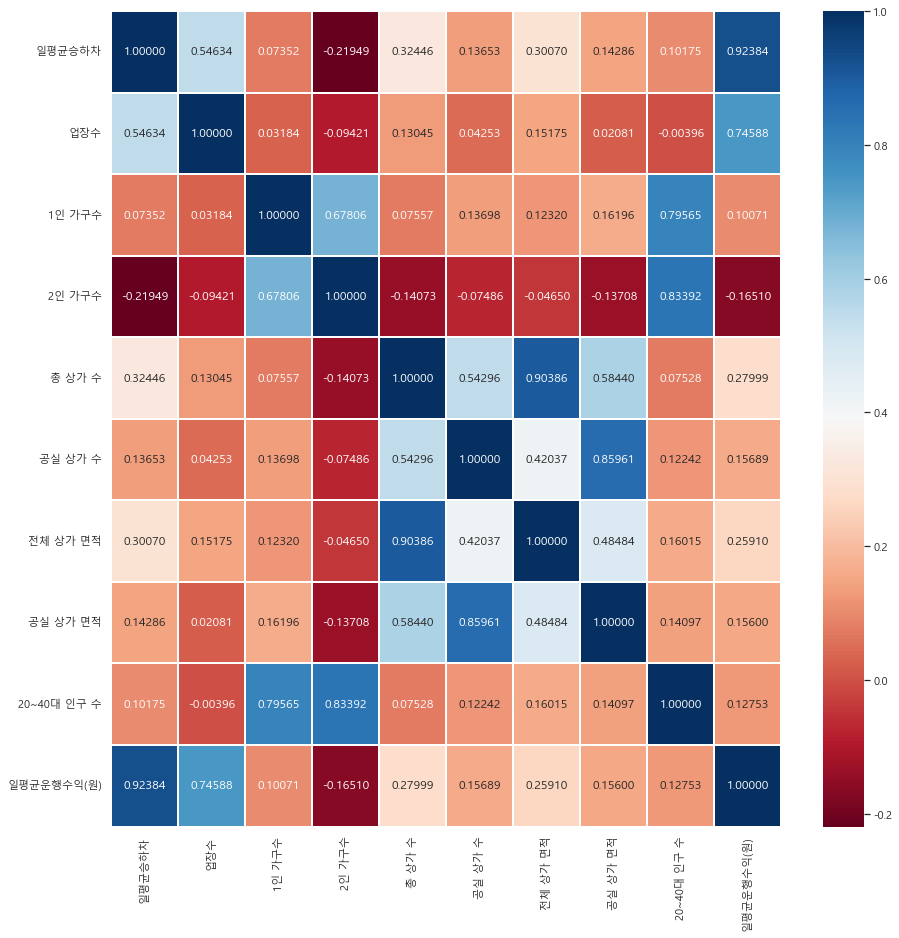

In [ ]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_minmaxscale_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

### 다중회귀분석

#### 회귀모델 적합도

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
minmaxscale_x = minmaxscaled_df[["일평균승하차","업장수","1인 가구수","2인 가구수","총 상가 수","공실 상가 수","전체 상가 면적","공실 상가 면적","20~40대 인구 수"]]

In [ ]:
minmaxscale_y = minmaxscaled_df[["일평균운행수익(원)"]]

In [ ]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [ ]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [ ]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             일평균운행수익(원)   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              297.3
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    2.60e-46
Time:                        17:40:14   Log-Likelihood:                          147.26
No. Observations:                  69   AIC:                                     -276.5
Df Residuals:                      60   BIC:                                     -256.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

- R-squared : 0.978
- Adj. R-squared : 0.975
- p-value : 일평균승하차, 업장수, 20~40대 인구 수 외는 의미 X

In [ ]:
minmaxscale_x = minmaxscaled_df[["일평균승하차","업장수","20~40대 인구 수"]]

In [ ]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [ ]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [ ]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:             일평균운행수익(원)   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              829.8
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    2.57e-52
Time:                        17:40:14   Log-Likelihood:                          141.62
No. Observations:                  69   AIC:                                     -277.2
Df Residuals:                      66   BIC:                                     -270.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

- R-squared : 0.974
- Adj. R-squared : 0.973
- p-value : 일평균승하차, 업장수 O / 20~40대 인구수 X

#### 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [ ]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.9527677599960804

In [ ]:
multi_model.score(x_test, y_test)

0.8422936316025964

#### 예측

In [ ]:
my_predict = mlr.predict(x_test)
my_predict

array([[ 0.34156256],
       [ 0.09566193],
       [ 0.12563807],
       [ 0.06788158],
       [ 0.18586016],
       [ 0.18449627],
       [ 0.05836808],
       [ 0.16097731],
       [ 0.05202148],
       [ 0.0540867 ],
       [ 0.05466083],
       [ 0.20000171],
       [ 0.07086804],
       [ 0.10865281],
       [ 0.02324078],
       [ 0.08146344],
       [ 0.09731142],
       [ 0.06992196],
       [ 0.09764628],
       [ 0.23322591],
       [ 0.21075211],
       [ 0.00599809],
       [-0.00887148],
       [ 0.01470707],
       [ 0.12005292],
       [ 0.38689156],
       [ 0.07030586],
       [ 0.25919348],
       [ 0.15284804],
       [ 0.04404111]])

#### 시각화

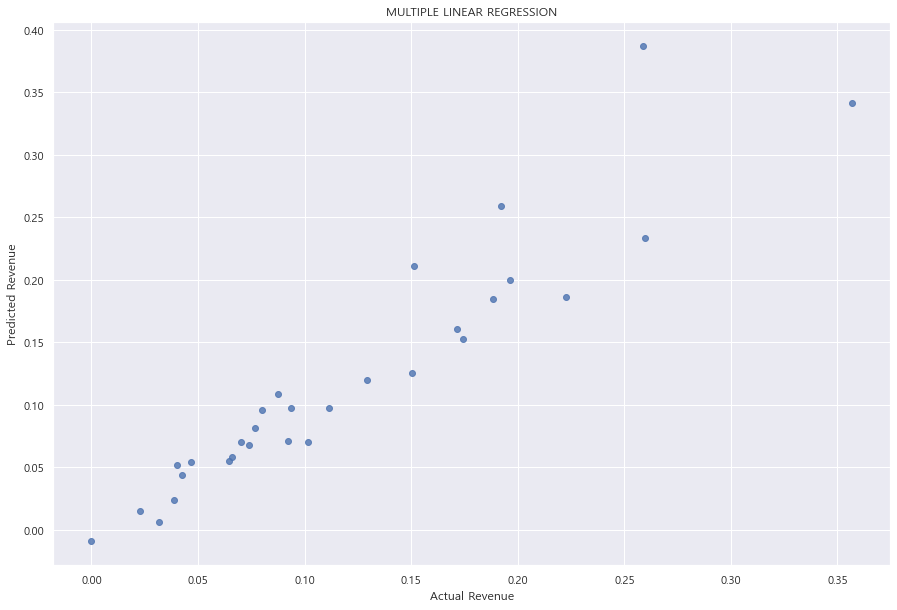

In [ ]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [ ]:
print(mlr.coef_)

[[0.57587834 0.38760788 0.03520961]]


#### 라쏘 회귀 모델

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.9527677599960804
0.8422936316025964


C:\Users\admin\AppData\Local\Temp\ipykernel_10084\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.118e-02, tolerance: 1.320e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [ ]:
print(train_score)
print(test_score)

[0.9485061377293889, 0.6714056161930345, 0.0, 0.0, 0.0, 0.0]
[0.8645749932312974, 0.8489264560698606, -0.034882409657104985, -0.034882409657104985, -0.034882409657104985, -0.034882409657104985]


In [ ]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[0. 0. 0.]
[0.13507503]


#### (정규화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.9485061377293889</td>
	    <td>0.8645749932312974</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.6714056161930345</td>
	    <td>0.8489264560698606</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.0</td>
	    <td>-0.034882409657104985</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.0</td>
	    <td>-0.034882409657104985</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.034882409657104985</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td>-0.034882409657104985</td>
	</tr>
</table>

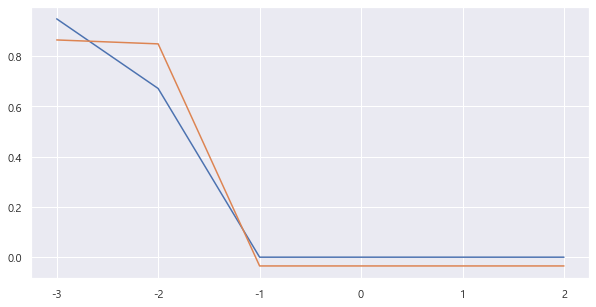

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

#### 릿지 회귀 모델

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.8794224767889404

In [ ]:
ridge.score(X=x_test, y=y_test)

0.8667958475538281

In [ ]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [ ]:
print(train_score)
print(test_score)

[0.9527676193372737, 0.9527537915852347, 0.9514629562602688, 0.8794224767889404, 0.35322420225283224, 0.04779679144771154]
[0.8424704229810098, 0.8440372606016241, 0.8574665073049645, 0.8667958475538281, 0.36776453337466986, 0.020981315779622034]


In [ ]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[0.01443413 0.01006453 0.00136886]]
[0.13095712]


#### (정규화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.9527676193372737</td>
	    <td>0.8424704229810098</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.9527537915852347</td>
	    <td>0.8440372606016241</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.9514629562602688</td>
	    <td>0.8574665073049645</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.8794224767889404</td>
	    <td>0.8667958475538281</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.35322420225283224</td>
	    <td>0.36776453337466986</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.04779679144771154</td>
	    <td>0.020981315779622034</td>
	</tr>
</table>

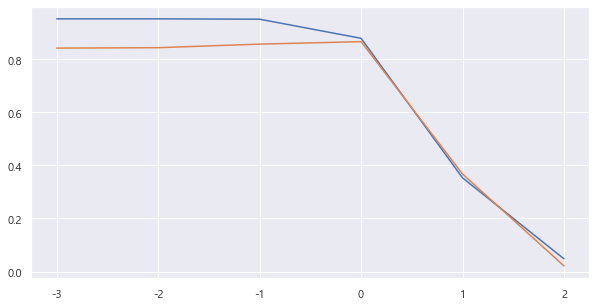

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

train_score와 test_score값이 떨어지기 전 + 일치할 때인, alpha가 1일떄 가장 최적화됐다.

### Min-max scaler로 정규화한 데이터를 가지고 Ridge모델을 사용하는 것이 가장 좋은 결과가 나옴

# 번외

### 데이터
- 역별 데이터
- 2016년 ~ 2022년 10월
- 일평균승하차 : 역별 일평균승하차
- 업장수 : 10인 이하 업체
- 일평균(원) : 역별 일평균 운수 수익

In [ ]:
df = pd.read_csv("./2016~2022_일평균 승하차,운수수익.csv", encoding="euc-kr")
df

,역사명,연도,일평균 승하차,일평균 운수수익
0,가야,2016,7289.0,2579454
1,감전,2016,7626.0,3395089
2,강서구청,2016,5600.0,2717454
3,개금,2016,16331.0,6317217
4,거제,2016,9650.0,4150958
...,...,...,...,...
688,충렬사,2022,5719.0,1056843
689,토성,2022,15118.0,5678334
690,하단,2022,32746.0,10415912
691,해운대,2022,23072.0,8352193


### 결측치 채워넣기

In [ ]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     6
일평균 운수수익    0
dtype: int64

In [ ]:
df = df.fillna(0)
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [ ]:
df.iloc[124]["일평균 승하차"]

11170.0

In [ ]:
# 다대포해수욕장은 증가/감소 추세가 섞여 있어서 2017년 값을 대입
df.iat[25,2] = 11170.0
df.iat[25,2]

11170.0

낫개, 다대포항, 동매, 신장림, 장림역은 증가 추세가 보이므로 가격 차이만큼 역산하여 넣기

In [ ]:
# 낫개역
df.iat[21,2] = 9122
df.iat[21,2]

9122.0

In [ ]:
# 다대포항
df.iat[24,2] = 6886
df.iat[24,2]

6886.0

In [ ]:
# 동매
df.iat[34,2] = 5434
df.iat[34,2]

5434.0

In [ ]:
# 신장림
df.iat[74,2] = 5725
df.iat[74,2]

5725.0

In [ ]:
# 장림
df.iat[82,2] = 4590
df.iat[82,2]

4590.0

In [ ]:
df.isnull().sum()

역사명         0
연도          0
일평균 승하차     0
일평균 운수수익    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   역사명       693 non-null    object 
 1   연도        693 non-null    int64  
 2   일평균 승하차   693 non-null    float64
 3   일평균 운수수익  693 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.8+ KB


In [ ]:
df['일평균 승하차'] = df[['일평균 승하차']].astype(int)

### 산점도

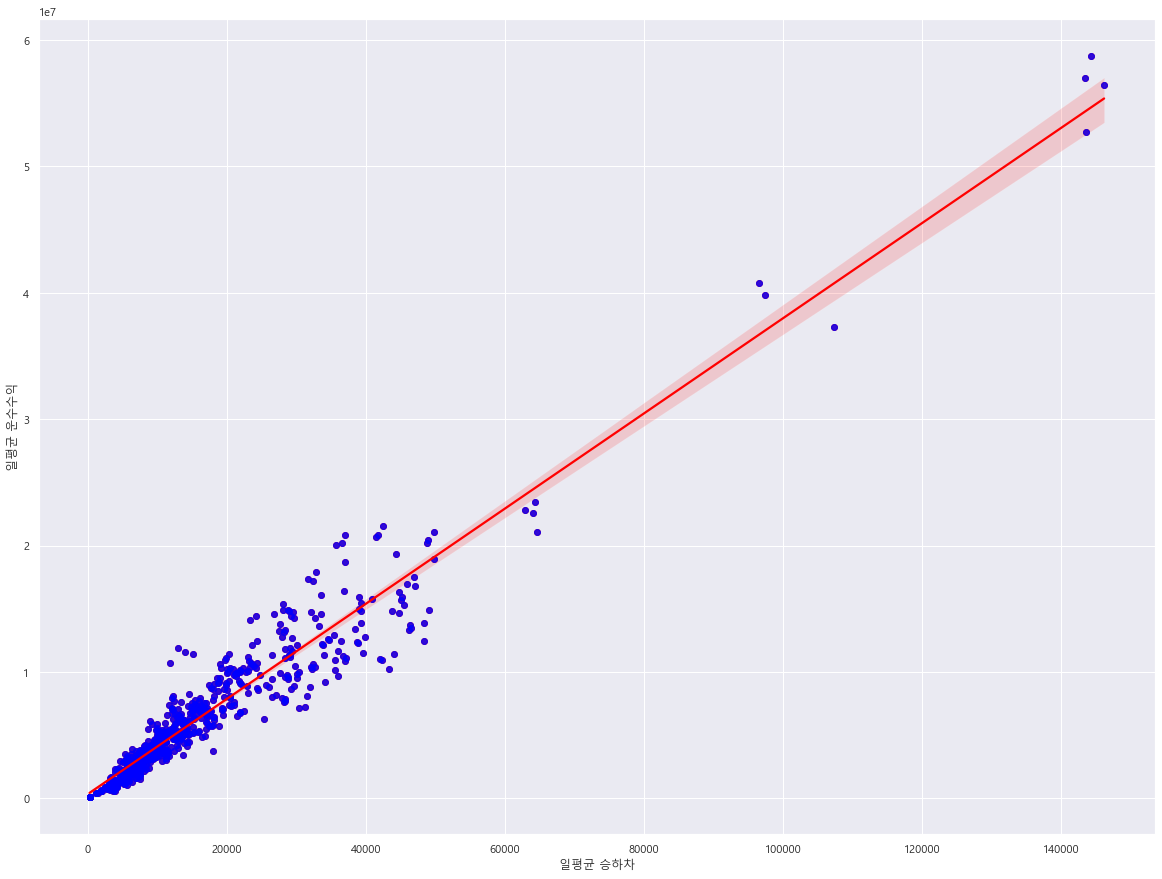

In [ ]:
plt.figure(figsize=(20,15))
sns.regplot(x='일평균 승하차', y='일평균 운수수익', data=df, color="red")
plt.scatter(df[['일평균 승하차']], df[['일평균 운수수익']], alpha=0.8, color='blue')
plt.show()